In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df = pd.read_csv('Merged Data t.csv')
df2 = pd.read_csv('Merged Data t+1.csv')

In [3]:
df

,CO_PER_ROL,SALARY,STOCKOPT,GVKEY,YEAR,BECAMECEO,LEFTOFC,TITLE,EXEC_LNAME,EXEC_FNAME,...,BECAMECEOYE,LEFTOFCYE,SIMPLE_RETURN,SALCH,STOCH,SALARY_THOU,STOCKOPT_MIL,RETURNS,SAL_CH_PER,STO_CH_PER
0,6,761.535,NaN,1078,1992,1989-12-01,1998-12-31,chmn.,Burnham,Duane,...,1989.0,1998.0,NaN,NaN,NaN,7.61535,NaN,NaN,NaN,NaN
1,6,772.615,NaN,1078,1993,1989-12-01,1998-12-31,chmn.,Burnham,Duane,...,1989.0,1998.0,-0.024691,0.014550,NaN,7.72615,NaN,-2.469136,1.454956,NaN
2,6,794.269,NaN,1078,1994,1989-12-01,1998-12-31,chmn.,Burnham,Duane,...,1989.0,1998.0,0.101266,0.028027,NaN,7.94269,NaN,10.126582,2.802690,NaN
3,6,818.269,NaN,1078,1995,1989-12-01,1998-12-31,chmn.,Burnham,Duane,...,1989.0,1998.0,0.275862,0.030216,NaN,8.18269,NaN,27.586207,3.021646,NaN
4,6,846.923,NaN,1078,1996,1989-12-01,1998-12-31,chmn.,Burnham,Duane,...,1989.0,1998.0,0.219219,0.035018,NaN,8.46923,NaN,21.921922,3.501782,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,63380,831.731,4130.910,28477,2015,2013-05-19,NaN,NaN,Teich,Andrew,...,2013.0,NaN,-0.131229,0.144544,1.022649,8.31731,4.130910,-13.122872,14.454404,102.264867
9243,63380,835.731,5737.770,28477,2016,2013-05-19,NaN,NaN,Teich,Andrew,...,2013.0,NaN,0.289277,0.004809,0.388985,8.35731,5.737770,28.927681,0.480925,38.898451
9244,66910,591.667,4085.956,27638,2016,2016-11-01,NaN,"President, CEO & Director",Harvey,Roy,...,2016.0,NaN,NaN,NaN,NaN,5.91667,4.085956,NaN,NaN,NaN
9245,66910,925.000,9869.766,27638,2017,2016-11-01,NaN,"President, CEO & Director",Harvey,Roy,...,2016.0,NaN,0.918447,0.563379,1.415534,9.25000,9.869766,91.844729,56.337940,141.553409


In [4]:
df = df[df['SAL_CH_PER'] < 1000]
df = df[df['STO_CH_PER'] < 1000]
df

,CO_PER_ROL,SALARY,STOCKOPT,GVKEY,YEAR,BECAMECEO,LEFTOFC,TITLE,EXEC_LNAME,EXEC_FNAME,...,BECAMECEOYE,LEFTOFCYE,SIMPLE_RETURN,SALCH,STOCH,SALARY_THOU,STOCKOPT_MIL,RETURNS,SAL_CH_PER,STO_CH_PER
47,79,1350.000,17737.752,1380,2007,1995-05-03,NaN,CEO & Director,Hess,John,...,1995.0,NaN,1.034698,0.080000,0.077795,13.50000,17.737752,103.469841,8.000000,7.779533
48,79,1500.000,26334.067,1380,2008,1995-05-03,NaN,CEO & Director,Hess,John,...,1995.0,NaN,-0.468174,0.111111,0.484634,15.00000,26.334067,-46.817371,11.111111,48.463385
49,79,1500.000,18950.608,1380,2009,1995-05-03,NaN,CEO & Director,Hess,John,...,1995.0,NaN,0.127890,0.000000,-0.280377,15.00000,18.950608,12.788963,0.000000,-28.037671
50,79,1500.000,18188.947,1380,2010,1995-05-03,NaN,CEO & Director,Hess,John,...,1995.0,NaN,0.265124,0.000000,-0.040192,15.00000,18.188947,26.512397,0.000000,-4.019190
51,79,1500.000,17474.844,1380,2011,1995-05-03,NaN,CEO & Director,Hess,John,...,1995.0,NaN,-0.257904,0.000000,-0.039260,15.00000,17.474844,-25.790436,0.000000,-3.926027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,60576,850.005,4437.000,25880,2018,2017-11-20,2022-10-12,"CEO, President & Director",Walchirk,Mark,...,2017.0,2022.0,-0.455854,1.215915,0.099899,8.50005,4.437000,-45.585386,121.591487,9.989921
9242,63380,831.731,4130.910,28477,2015,2013-05-19,NaN,NaN,Teich,Andrew,...,2013.0,NaN,-0.131229,0.144544,1.022649,8.31731,4.130910,-13.122872,14.454404,102.264867
9243,63380,835.731,5737.770,28477,2016,2013-05-19,NaN,NaN,Teich,Andrew,...,2013.0,NaN,0.289277,0.004809,0.388985,8.35731,5.737770,28.927681,0.480925,38.898451
9245,66910,925.000,9869.766,27638,2017,2016-11-01,NaN,"President, CEO & Director",Harvey,Roy,...,2016.0,NaN,0.918447,0.563379,1.415534,9.25000,9.869766,91.844729,56.337940,141.553409


In [5]:
df.to_csv(r'C:\Users\yuxua\Desktop\ECON 494\Project Draft\Merged Data t cleaned.csv', index = False)

In [6]:
df2

,CO_PER_ROL,SALARY,STOCKOPT,GVKEY,YEAR,BECAMECEO,LEFTOFC,TITLE,EXEC_LNAME,EXEC_FNAME,...,BECAMECEOYE,LEFTOFCYE,SIMPLE_RETURN,SALCH,STOCH,SALARY_THOU,STOCKOPT_MIL,RETURNS,SAL_CH_PER,STO_CH_PER
0,6,761.535,NaN,1078,1992,12/1/1989,12/31/1998,chmn.,Burnham,Duane,...,1989,1998.0,NaN,NaN,NaN,7.61535,NaN,-2.469136,NaN,NaN
1,6,772.615,NaN,1078,1993,12/1/1989,12/31/1998,chmn.,Burnham,Duane,...,1989,1998.0,-0.024691,0.014550,NaN,7.72615,NaN,10.126582,1.454956,NaN
2,6,794.269,NaN,1078,1994,12/1/1989,12/31/1998,chmn.,Burnham,Duane,...,1989,1998.0,0.101266,0.028027,NaN,7.94269,NaN,27.586207,2.802690,NaN
3,6,818.269,NaN,1078,1995,12/1/1989,12/31/1998,chmn.,Burnham,Duane,...,1989,1998.0,0.275862,0.030216,NaN,8.18269,NaN,21.921922,3.021646,NaN
4,6,846.923,NaN,1078,1996,12/1/1989,12/31/1998,chmn.,Burnham,Duane,...,1989,1998.0,0.219219,0.035018,NaN,8.46923,NaN,29.064039,3.501782,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,63380,831.731,4130.910,28477,2015,5/19/2013,NaN,NaN,Teich,Andrew,...,2013,NaN,-0.131229,0.144544,1.022649,8.31731,4.130910,28.927681,14.454404,102.264867
9243,63380,835.731,5737.770,28477,2016,5/19/2013,NaN,NaN,Teich,Andrew,...,2013,NaN,0.289277,0.004809,0.388985,8.35731,5.737770,NaN,0.480925,38.898451
9244,66910,591.667,4085.956,27638,2016,11/1/2016,NaN,"President, CEO & Director",Harvey,Roy,...,2016,NaN,NaN,NaN,NaN,5.91667,4.085956,91.844729,NaN,NaN
9245,66910,925.000,9869.766,27638,2017,11/1/2016,NaN,"President, CEO & Director",Harvey,Roy,...,2016,NaN,0.918447,0.563379,1.415534,9.25000,9.869766,-50.658994,56.337940,141.553409


In [7]:
df2 = df2[df2['SAL_CH_PER'] < 1000]
df2 = df2[df2['STO_CH_PER'] < 1000]
df2

,CO_PER_ROL,SALARY,STOCKOPT,GVKEY,YEAR,BECAMECEO,LEFTOFC,TITLE,EXEC_LNAME,EXEC_FNAME,...,BECAMECEOYE,LEFTOFCYE,SIMPLE_RETURN,SALCH,STOCH,SALARY_THOU,STOCKOPT_MIL,RETURNS,SAL_CH_PER,STO_CH_PER
47,79,1350.000,17737.752,1380,2007,5/3/1995,NaN,CEO & Director,Hess,John,...,1995,NaN,1.034698,0.080000,0.077795,13.50000,17.737752,-46.817371,8.000000,7.779533
48,79,1500.000,26334.067,1380,2008,5/3/1995,NaN,CEO & Director,Hess,John,...,1995,NaN,-0.468174,0.111111,0.484634,15.00000,26.334067,12.788963,11.111111,48.463385
49,79,1500.000,18950.608,1380,2009,5/3/1995,NaN,CEO & Director,Hess,John,...,1995,NaN,0.127890,0.000000,-0.280377,15.00000,18.950608,26.512397,0.000000,-28.037671
50,79,1500.000,18188.947,1380,2010,5/3/1995,NaN,CEO & Director,Hess,John,...,1995,NaN,0.265124,0.000000,-0.040192,15.00000,18.188947,-25.790436,0.000000,-4.019190
51,79,1500.000,17474.844,1380,2011,5/3/1995,NaN,CEO & Director,Hess,John,...,1995,NaN,-0.257904,0.000000,-0.039260,15.00000,17.474844,-6.760563,0.000000,-3.926027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,60576,850.005,4437.000,25880,2018,11/20/2017,10/12/2022,"CEO, President & Director",Walchirk,Mark,...,2017,2022.0,-0.455854,1.215915,0.099899,8.50005,4.437000,-21.022727,121.591487,9.989921
9242,63380,831.731,4130.910,28477,2015,5/19/2013,NaN,NaN,Teich,Andrew,...,2013,NaN,-0.131229,0.144544,1.022649,8.31731,4.130910,28.927681,14.454404,102.264867
9243,63380,835.731,5737.770,28477,2016,5/19/2013,NaN,NaN,Teich,Andrew,...,2013,NaN,0.289277,0.004809,0.388985,8.35731,5.737770,NaN,0.480925,38.898451
9245,66910,925.000,9869.766,27638,2017,11/1/2016,NaN,"President, CEO & Director",Harvey,Roy,...,2016,NaN,0.918447,0.563379,1.415534,9.25000,9.869766,-50.658994,56.337940,141.553409


In [8]:
df2.to_csv(r'C:\Users\yuxua\Desktop\ECON 494\Project Draft\Merged Data t+1 cleaned.csv', index = False)

In [12]:
df_comp_per_state = df.groupby('STATE')['TICKER'].nunique()
df_comp_per_state = df_comp_per_state.reset_index()
df_comp_per_state.columns = ['STATE', 'COMPANIES']
df_comp_per_state

,STATE,COMPANIES
0,AL,2
1,AR,2
2,AZ,6
3,CA,48
4,CO,6
5,CT,11
6,DC,3
7,DE,2
8,FL,13
9,GA,14


In [13]:
df_comp_per_sector = df.groupby('Sector_Code')['TICKER'].nunique()
df_comp_per_sector = df_comp_per_sector.reset_index()
df_comp_per_sector.columns = ['SECTOR', 'COMPANIES']
df_comp_per_sector

,SECTOR,COMPANIES
0,1.0,50
1,2.0,14
2,3.0,34
3,4.0,33
4,5.0,68
5,6.0,42
6,7.0,54
7,8.0,55
8,9.0,25
9,10.0,4


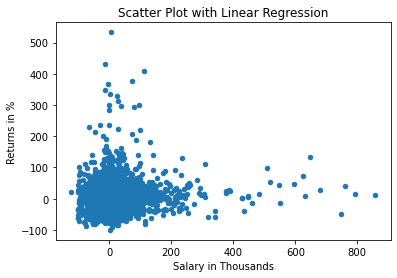

In [23]:
df.plot.scatter(x="STO_CH_PER", y="RETURNS")

# set the labels and title
plt.xlabel('Salary in Thousands')
plt.ylabel('Returns in %')
plt.title('Scatter Plot with Linear Regression')

# show the plot
plt.show()

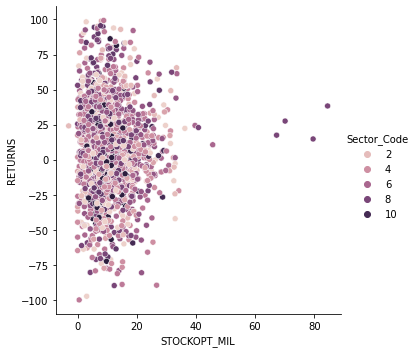

In [20]:
df2 = df2[df2['RETURNS'] < 100]
df2 = df2[df2['SAL_CH_PER'] < 10]
df2 = df2[df2['STO_CH_PER'] < 10]
sns.relplot(data=df2, x="STOCKOPT_MIL", y="RETURNS", hue="Sector_Code")

In [23]:
results = smf.ols("RETURNS ~ STO_CH_PER ", data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                RETURNS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6373
Date:                Mon, 10 Apr 2023   Prob (F-statistic):              0.425
Time:                        14:05:00   Log-Likelihood:                -9616.9
No. Observations:                1989   AIC:                         1.924e+04
Df Residuals:                    1987   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1437      0.811     10.047      0.0

In [12]:
results2 = smf.ols("RETURNS ~ SALARY + STOCKOPT", data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                RETURNS   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4065
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.666
Time:                        18:28:58   Log-Likelihood:                -370.73
No. Observations:                 634   AIC:                             747.5
Df Residuals:                     631   BIC:                             760.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1502      0.034      4.364      0.0

In [14]:
results3 = smf.ols("RETURNS ~ STOCKOPT", data=df).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                RETURNS   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7403
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.390
Time:                        18:46:38   Log-Likelihood:                -370.76
No. Observations:                 634   AIC:                             745.5
Df Residuals:                     632   BIC:                             754.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1582      0.017      9.106      0.0